In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
from gp import gp, kernel

In [2]:
kt = kernel.celerite_root2_kernel(1, 0.01)

def gauss(x, a, mu, sig):
    
    return a*np.exp(-0.5*((x-mu)**2/sig))

mean = [lambda x: gauss(x, 1, 2, 0.5)]*4

In [25]:
process = gp(mean, kt, jitter=0.001)

In [26]:
x = np.linspace(0, 10, 200)
c = [1, 5, 10, 7]

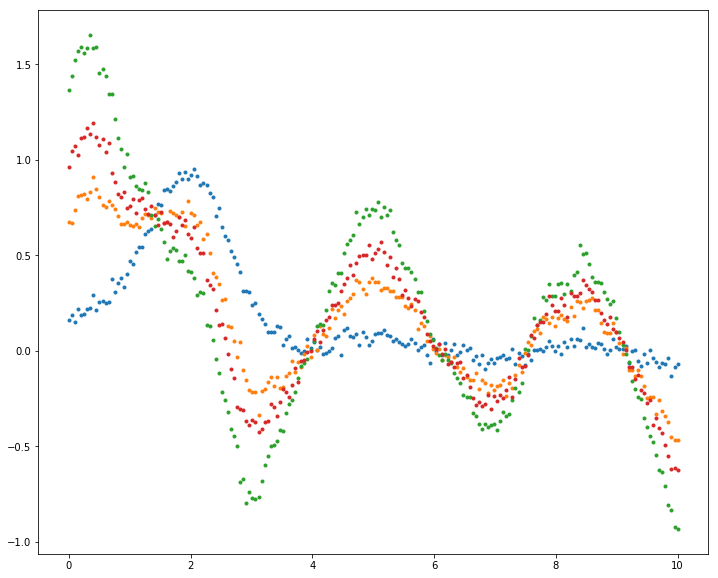

In [27]:
samp = process.sample(x, c)

fig = pl.figure(figsize=(12, 10))
[pl.plot(x, s, '.') for s in samp[0]]
data = samp[0]

In [32]:
jitter = np.logspace(-4, 2, 50)
like = []
for j in jitter:
    process = gp(mean, kt, jitter=j)
    like.append(process.log_likelihood(data, x, c))

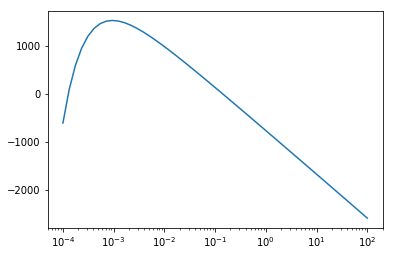

In [33]:
pl.semilogx(jitter, like)

In [30]:
from numpy.linalg import eig
from numpy.linalg import inv
from numpy.linalg import det

In [144]:
sig = 0.1
a = np.matrix(np.outer([1, 2, 3, 4], [1, 2, 3, 4])) + np.matrix(np.diag([sig]*4))
lam, Q = eig(np.matrix(np.outer([1, 2, 3, 4], [1, 2, 3, 4])))

In [148]:
np.log(det(a))

-3.503230107227305

In [150]:
np.sum(np.log(1 + lam/sig)) + 4*np.log(sig)

-3.5032301072273047

In [131]:
kt(np.array([1, 2, 3, 4]))

array([ 0.00491558,  0.00196615,  0.00027897, -0.00026886])

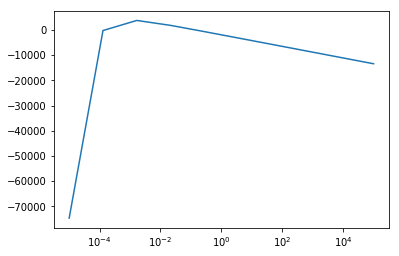

In [20]:
pl.semilogx(np.logspace(-5, 5, 10), like)